In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = 'tesseract'

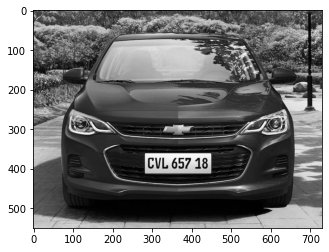

In [2]:
placa = []
image = cv2.imread('auto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

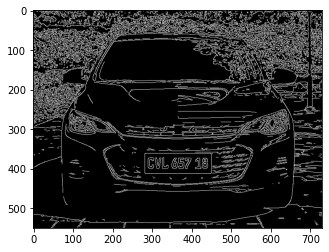

In [3]:
canny = cv2.Canny(gray, 150, 200)
plt.imshow(canny, cmap='gray')

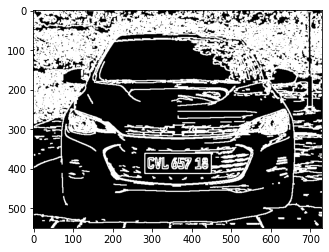

In [4]:
canny = cv2.dilate(canny, None, iterations=1)
plt.imshow(canny,cmap='gray')

In [5]:
cnts, _ = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #OpenCV

area:  8126.0
w  167
h  50
Relacion de aspecto:  3.34
Placa: CVL 657 18


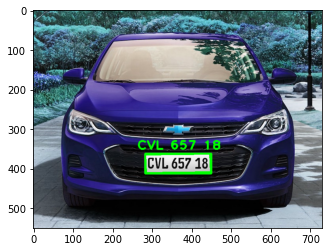

In [10]:
for c in cnts:
    area = cv2.contourArea(c)
    #if area > 5000: print(area)
    x, y, w, h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    #print('hola')
    #print('approx: ', len(approx))
    #print('area: ', area)
    #print('------------------------')
    if len(approx) == 4 and area > 7500:
        print('area: ', area)
        print('w ', w)
        print('h ', h)
        aspect_ratio = float(w)/h
        print('Relacion de aspecto: ', aspect_ratio)
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 3)
        if aspect_ratio > 3:
          placa = gray[y:y+h, x:x+w]
          text = pytesseract.image_to_string(placa, config="--psm 11").strip()
          print('Placa:',text)
          cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 3)
          cv2.putText(image, text, (x-20, y-10), 1, 2.2, (0,255,0), 3)
plt.imshow(image)